# Stock Price Prediction using Neural Net
Warning: This is a sample code demonostrating stock price prediction and its not for using in your portfolio.DO NOT use it for your real life stock transctions.Strictly for learning peuposes.

In [67]:
#Importing Modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,LSTM

### Load the Train Data

In [68]:
#Ticker symbol of the company
company = 'FB'
#Date from which we are collecting the data (year, month, date)
start = dt.datetime(2012,1,1)
end = dt.datetime(2021,1,1)
data = web.DataReader(company,'yahoo',start,end)

In [69]:
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-05-18,45.000000,38.000000,42.049999,38.230000,573576400,38.230000
2012-05-21,36.660000,33.000000,36.529999,34.029999,168192700,34.029999
2012-05-22,33.590000,30.940001,32.610001,31.000000,101786600,31.000000
2012-05-23,32.500000,31.360001,31.370001,32.000000,73600000,32.000000
2012-05-24,33.209999,31.770000,32.950001,33.029999,50237200,33.029999
...,...,...,...,...,...,...
2020-12-24,270.399994,266.200012,268.880005,267.399994,6702000,267.399994
2020-12-28,277.299988,265.660004,268.739990,277.000000,23299700,277.000000
2020-12-29,280.510010,276.279999,276.950012,276.779999,16383000,276.779999


For our model prediction we will use only the `Closing` price of the Share.

In [70]:
#Prepare the data
#To know difference between Normalisation & Standardization (https://www.geeksforgeeks.org/normalization-vs-standardization/))
#Here we are doing Data Normalisation
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

#How many past days of data we want to use to predict the next day price
prediction_days = 60

#Preparing the Training data
X_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
    X_train.append(scaled_data[x-prediction_days:x, 0]) #Extra zero made it 1D
    y_train.append(scaled_data[x,0])

X_train, y_train = np.array(X_train), np.array(y_train)
#Reshaping so that it will work in Neural net
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [71]:
X_train.shape, y_train.shape

((2110, 60, 1), (2110,))

In [72]:
scaled_data

array([[0.07163324],
       [0.05695716],
       [0.04636942],
       ...,
       [0.90519951],
       [0.88804246],
       [0.89255014]])

In [73]:
scaled_data[60-prediction_days:60,0], scaled_data[60,0]

(array([0.07163324, 0.05695716, 0.04636942, 0.04986372, 0.05346285,
        0.04954924, 0.03882172, 0.03655043, 0.04147739, 0.0349081 ,
        0.03204277, 0.02844364, 0.03172828, 0.02998113, 0.03274163,
        0.03242715, 0.03378992, 0.03333567, 0.03689986, 0.04291006,
        0.04780208, 0.04954924, 0.048466  , 0.04930463, 0.05353274,
        0.05007339, 0.05370745, 0.05066741, 0.04762737, 0.04671885,
        0.04556573, 0.04706828, 0.04801174, 0.04892026, 0.05045775,
        0.04801174, 0.04626459, 0.0457055 , 0.04539101, 0.03676008,
        0.03620099, 0.03976519, 0.03938081, 0.03854218, 0.03850723,
        0.03745895, 0.04056887, 0.03186806, 0.02089594, 0.01893913,
        0.01390733, 0.01100706, 0.00807185, 0.01174086, 0.01464114,
        0.01044797, 0.01044797, 0.01146132, 0.01425676, 0.01352296]),
 0.009259904886367458)

Basically we want to tell our model for last above 60 datapoints the prediction value should be `0.01326525310335848`

In [74]:
#Building the Model
#We can test with diferent hyperparameter values like no of Neurons, layers, dropouts...
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1)) #Output Layer

model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
66/66 [==============================] - 8s 57ms/step - loss: 0.0124
Epoch 2/100
66/66 [==============================] - 4s 57ms/step - loss: 0.0032: 0s
Epoch 3/100
66/66 [==============================] - 4s 57ms/step - loss: 0.0026
Epoch 4/100
66/66 [==============================] - 4s 56ms/step - loss: 0.0027
Epoch 5/100
66/66 [==============================] - 4s 66ms/step - loss: 0.0025
Epoch 6/100
66/66 [==============================] - 4s 68ms/step - loss: 0.0024
Epoch 7/100
66/66 [==============================] - 4s 67ms/step - loss: 0.0022
Epoch 8/100
66/66 [==============================] - 4s 67ms/step - loss: 0.0021
Epoch 9/100
66/66 [==============================] - 4s 66ms/step - loss: 0.0020
Epoch 10/100
66/66 [==============================] - 4s 67ms/step - loss: 0.0019
Epoch 11/100
66/66 [==============================] - 4s 67ms/step - loss: 0.0019
Epoch 12/100
66/66 [==============================] - 4s 67ms/step - loss: 0.0020
Epoch 13/100
66/66 [=

66/66 [==============================] - 5s 78ms/step - loss: 6.1196e-04
Epoch 98/100
66/66 [==============================] - 5s 78ms/step - loss: 6.5025e-04
Epoch 99/100
66/66 [==============================] - 5s 77ms/step - loss: 6.5623e-04
Epoch 100/100
66/66 [==============================] - 5s 78ms/step - loss: 6.1273e-04


Note: Latest version of `Numpy e.g 1.20` cause some compatibility issue with current python 3.7 version hence downgraded the `Numpy` to 1.18.5

In [75]:
np.__version__

'1.18.5'

### Prepraing the Test data to fed it to Model for Prediction
* Our training data is taken from `1st January 2012` to `1st January 2020`
* Our Test data will be from `1st January 2020` to `Current`

In [76]:
#Load the Test data
test_start = dt.datetime(2021,1,1)
test_end = dt.datetime.now()
test_data = web.DataReader(company, 'yahoo', test_start, test_end)
actual_prices = test_data['Close'].values

total_dataset = pd.concat((data['Close'],test_data['Close']), axis=0)
model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days: ].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)

In [77]:
test_data.shape, total_dataset.shape, len(model_inputs)

((122, 6), (2292,), 182)

In [78]:
#Preparaing the Test data
X_test = []
for x in range(prediction_days, len(model_inputs)):
    X_test.append(model_inputs[x-prediction_days:x, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [79]:
X_train.shape, X_test.shape

((2110, 60, 1), (122, 60, 1))

In [80]:
print(f"No of days in Total dataset: {total_dataset.shape[0]}")
print(f"No of days used for train: {X_train.shape[0]}")
print(f"No of days used for test: {X_test.shape[0]}")

No of days in Total dataset: 2292
No of days used for train: 2110
No of days used for test: 122


In [81]:
#Basically we are predicting our existing data to see how well model is performing
predicted_price = model.predict(X_test)
predicted_price = scaler.inverse_transform(predicted_price)

In [82]:
predicted_price[0:10]

array([[268.46957],
       [267.28363],
       [265.50845],
       [265.24683],
       [262.74106],
       [262.5998 ],
       [263.16302],
       [259.31238],
       [253.14912],
       [249.31758]], dtype=float32)

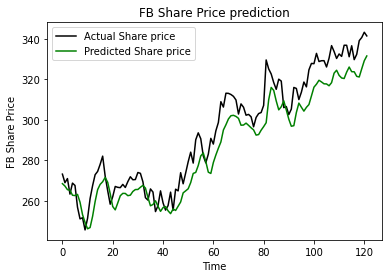

In [83]:
#Ploting the Test Predictions
plt.plot(actual_prices, color='black',label='Actual Share price')
plt.plot(predicted_price, color='green',label='Predicted Share price')
plt.title(f"{company} Share Price prediction")
plt.xlabel('Time')
plt.ylabel(f'{company} Share Price')
plt.legend()
plt.show()

In [84]:
#Predicting the Next Day price
real_data = [model_inputs[len(model_inputs) + 1 - prediction_days : len(model_inputs)+1, 0]]
real_data =  np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))
prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f"Tomorrow's {company} share price: {prediction}")

Tomorrow's FB share price: [[330.6379]]
